# RSA Text Breaking - Message Chunking Visualizer

This notebook demonstrates how messages are split into chunks for RSA encryption, similar to how encryption systems divide data into manageable blocks (e.g., 248-byte chunks).

## Setup

Install and import required libraries for visualization.

In [1]:
# Install required packages
%pip install matplotlib

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import to_rgb
import textwrap

Note: you may need to restart the kernel to use updated packages.


## Input Your Message

Enter the message you want to split into chunks.

In [2]:
# Get user input
user_input = input("Enter your message to encrypt (or type 'example' for a large sample): ")

chunk_size = 248  # Standard chunk size for RSA (in bytes)

# If user types "example", use a large sample message
if user_input.lower() == "example":
    # Create a message that's at least 5 * 248 = 1240 bytes (we'll make it larger)
    sample_text = """This is a comprehensive demonstration of RSA encryption message chunking. RSA (Rivest-Shamir-Adleman) is one of the first public-key cryptosystems and is widely used for secure data transmission. In such a cryptosystem, the encryption key is public and it is different from the decryption key which is kept secret (private). In RSA, this asymmetry is based on the practical difficulty of the factorization of the product of two large prime numbers, the "factoring problem". The acronym RSA is made of the initial letters of the surnames of Ron Rivest, Adi Shamir, and Leonard Adleman, who first publicly described the algorithm in 1977. Clifford Cocks, an English mathematician working for the British intelligence agency Government Communications Headquarters (GCHQ), had developed an equivalent system in 1973, but this was not declassified until 1997. A user of RSA creates and then publishes a public key based on two large prime numbers, along with an auxiliary value. The prime numbers must be kept secret. Anyone can use the public key to encrypt a message, but only someone with knowledge of the prime numbers can decode the message. Breaking RSA encryption is known as the RSA problem. Whether it is as difficult as the factoring problem remains an open question. RSA is a relatively slow algorithm, and because of this, it is less commonly used to directly encrypt user data. More often, RSA passes encrypted shared keys for symmetric key cryptography which in turn can perform bulk encryption-decryption operations at much higher speed. The idea of an asymmetric public-private key cryptosystem is attributed to Whitfield Diffie and Martin Hellman, who published this concept in 1976. They also introduced digital signatures and attempted to apply number theory. Their formulation used a shared-secret-key created from exponentiation of some number, modulo a prime number. However, they left open the problem of realizing a one-way function, possibly because the difficulty of factoring was not well-studied at the time. Ron Rivest, Adi Shamir, and Leonard Adleman at the Massachusetts Institute of Technology made several attempts over the course of a year to create a one-way function that was hard to invert. Rivest and Shamir, as computer scientists, proposed many potential functions, while Adleman, as a mathematician, was responsible for finding their weaknesses. They tried many approaches including "knapsack-based" and "permutation polynomials". For a time, they thought what they wanted to achieve was impossible due to contradictory requirements. In April 1977, they spent Passover at the house of a student and drank a good deal of Manischewitz wine before returning home at around midnight. Rivest, unable to sleep, lay on the couch with a math textbook and started thinking about their one-way function. He spent the rest of the night formalizing his idea, and he had much of the paper ready by daybreak. The algorithm is now known as RSA – the initials of their surnames in same order as their paper. Clifford Cocks, an English mathematician working for the British intelligence agency GCHQ, described an equivalent system in an internal document in 1973. However, given the relatively expensive computers needed to implement it at the time, it was considered to be mostly a curiosity and, as far as is publicly known, was never deployed. His discovery, however, was not revealed until 1997 due to its top-secret classification. Kid-RSA (KRSA) is a simplified public-key cipher published in 1997, designed for educational purposes. Some people feel that learning Kid-RSA gives insight into RSA and other public-key ciphers, analogous to simplified DES. The security of the RSA cryptosystem is based on two mathematical problems: the problem of factoring large numbers and the RSA problem. Full decryption of an RSA ciphertext is thought to be infeasible on the assumption that both of these problems are hard, i.e., no efficient algorithm exists for solving them. Providing security against partial decryption may require the addition of a secure padding scheme. The RSA problem is defined as the task of taking eth roots modulo a composite n: recovering a value m such that c = m^e (mod n), where (n, e) is an RSA public key and c is an RSA ciphertext. Currently the most promising approach to solving the RSA problem is to factor the modulus n. With the ability to recover prime factors, an attacker can compute the secret exponent d from a public key (n, e), then decrypt c using the standard procedure. To accomplish this, an attacker factors n into p and q, and computes the totient φ(n) = (p-1)(q-1). The secret exponent d is the multiplicative inverse of e modulo φ(n). This is end of the example message demonstrating chunking."""
    
    message = sample_text
    # Repeat the message to ensure we have at least 5 chunks (5 * 248 = 1240 bytes)
    while len(message.encode('utf-8')) < 5 * chunk_size:
        message += " " + sample_text
    print(f"\n{'='*70}")
    print("Using example message (large sample for demonstration)")
else:
    message = user_input

print(f"\n{'='*70}")
print(f"Original Message: {message[:100]}{'...' if len(message) > 100 else ''}")
print(f"Message Length: {len(message)} characters")
print(f"Chunk Size: {chunk_size} bytes")
print(f"{'='*70}")



Original Message: hi
Message Length: 2 characters
Chunk Size: 248 bytes


## Convert Message to Bytes

Show how the text is converted to bytes.

In [3]:
# Convert message to bytes
message_bytes = message.encode('utf-8')

print(f"\n{'='*70}")
print("TEXT TO BYTES CONVERSION")
print(f"{'='*70}\n")

print("Character → Byte Representation:\n")

# Only show first 50 characters to keep output readable
display_length = min(50, len(message))
for i in range(display_length):
    char = message[i]
    byte_val = message_bytes[i]
    print(f"  '{char}' → {byte_val:3d} (0x{byte_val:02x}) [binary: {bin(byte_val)[2:].zfill(8)}]")

if len(message) > display_length:
    print(f"\n  ... (showing first {display_length} of {len(message)} characters)")

print(f"\n{'─'*70}")
print(f"Total bytes: {len(message_bytes)} bytes")
print(f"{'─'*70}")



TEXT TO BYTES CONVERSION

Character → Byte Representation:

  'h' → 104 (0x68) [binary: 01101000]
  'i' → 105 (0x69) [binary: 01101001]

──────────────────────────────────────────────────────────────────────
Total bytes: 2 bytes
──────────────────────────────────────────────────────────────────────


## Split Into Chunks

Divide the message into chunks and visualize with colors.

In [4]:
# Split message into chunks
chunks = []
for i in range(0, len(message_bytes), chunk_size):
    chunk = message_bytes[i:i + chunk_size]
    chunks.append(chunk)

print(f"\n{'='*70}")
print(f"MESSAGE SPLIT INTO {len(chunks)} CHUNK(S)")
print(f"{'='*70}\n")

for idx, chunk in enumerate(chunks):
    chunk_text = chunk.decode('utf-8', errors='replace')
    
    print(f"╔{'═'*68}╗")
    print(f"║ CHUNK {idx + 1} - {len(chunk)} bytes{' '*(68 - len(f' CHUNK {idx + 1} - {len(chunk)} bytes'))}║")
    print(f"╚{'═'*68}╝")
    
    print(f"\nText preview (first 100 chars):")
    preview = chunk_text[:100] + ('...' if len(chunk_text) > 100 else '')
    print(f"  {preview}")
    
    print(f"\nByte form (first 20 bytes):")
    byte_preview = ' '.join([f"{b:02x}" for b in chunk[:20]])
    if len(chunk) > 20:
        byte_preview += " ..."
    print(f"  {byte_preview}")
    
    print(f"\nDecimal form (first 20 bytes):")
    decimal_preview = ' '.join([f"{b:3d}" for b in chunk[:20]])
    if len(chunk) > 20:
        decimal_preview += " ..."
    print(f"  {decimal_preview}")
    
    print(f"\n{'─'*70}\n")

print(f"\nTotal: {len(chunks)} chunks, {len(message_bytes)} bytes total")
print("See the colored visualization below! ↓")



MESSAGE SPLIT INTO 1 CHUNK(S)

╔════════════════════════════════════════════════════════════════════╗
║ CHUNK 1 - 2 bytes                                                  ║
╚════════════════════════════════════════════════════════════════════╝

Text preview (first 100 chars):
  hi

Byte form (first 20 bytes):
  68 69

Decimal form (first 20 bytes):
  104 105

──────────────────────────────────────────────────────────────────────


Total: 1 chunks, 2 bytes total
See the colored visualization below! ↓


## Complete Message Visualization

Show the entire message with colored chunks side by side.


COMPLETE MESSAGE WITH COLOR-CODED CHUNKS

✓ Image saved as 'rsa_chunk_visualization.png'


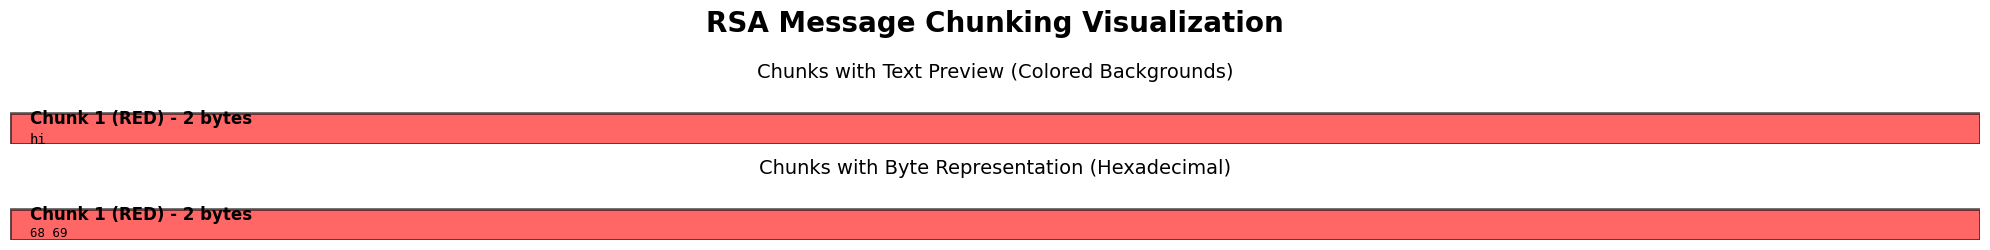


CHUNK SUMMARY

Chunk 1 (RED): 2 bytes
  Text preview: hi

──────────────────────────────────────────────────────────────────────
Total chunks: 1
Total bytes: 2
──────────────────────────────────────────────────────────────────────


In [5]:
print(f"\n{'='*70}")
print("COMPLETE MESSAGE WITH COLOR-CODED CHUNKS")
print(f"{'='*70}\n")

# Define colors for visualization
color_map = ['red', 'green', 'blue', 'yellow', 'magenta', 'cyan']
color_names = ['RED', 'GREEN', 'BLUE', 'YELLOW', 'MAGENTA', 'CYAN']

# Create visualization with larger figure size
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, len(chunks) * 2.5))
fig.suptitle('RSA Message Chunking Visualization', fontsize=20, fontweight='bold')

# === Top plot: Text representation with colored backgrounds ===
ax1.set_xlim(0, 10)
ax1.set_ylim(0, len(chunks))
ax1.axis('off')
ax1.set_title('Chunks with Text Preview (Colored Backgrounds)', fontsize=14, pad=20)

for idx, chunk in enumerate(chunks):
    color = color_map[idx % len(color_map)]
    color_name = color_names[idx % len(color_names)]
    chunk_text = chunk.decode('utf-8', errors='replace')
    
    # Draw colored rectangle
    y_pos = len(chunks) - idx - 1
    rect = mpatches.Rectangle((0, y_pos), 10, 0.8, 
                              linewidth=2, edgecolor='black', 
                              facecolor=color, alpha=0.6)
    ax1.add_patch(rect)
    
    # Add text preview (first 150 chars for larger display)
    preview = chunk_text[:150] + ('...' if len(chunk_text) > 150 else '')
    wrapped_text = textwrap.fill(preview, width=120)
    ax1.text(0.1, y_pos + 0.65, f"Chunk {idx+1} ({color_name}) - {len(chunk)} bytes", 
            fontsize=12, va='center', fontweight='bold')
    ax1.text(0.1, y_pos + 0.3, wrapped_text, 
            fontsize=10, va='top', family='monospace')

# === Bottom plot: Byte representation ===
ax2.set_xlim(0, 10)
ax2.set_ylim(0, len(chunks))
ax2.axis('off')
ax2.set_title('Chunks with Byte Representation (Hexadecimal)', fontsize=14, pad=20)

for idx, chunk in enumerate(chunks):
    color = color_map[idx % len(color_map)]
    color_name = color_names[idx % len(color_names)]
    
    # Draw colored rectangle
    y_pos = len(chunks) - idx - 1
    rect = mpatches.Rectangle((0, y_pos), 10, 0.8, 
                              linewidth=2, edgecolor='black', 
                              facecolor=color, alpha=0.6)
    ax2.add_patch(rect)
    
    # Add byte preview (first 60 bytes for larger display)
    byte_str = ' '.join([f"{b:02x}" for b in chunk[:60]])
    if len(chunk) > 60:
        byte_str += " ..."
    ax2.text(0.1, y_pos + 0.65, f"Chunk {idx+1} ({color_name}) - {len(chunk)} bytes", 
            fontsize=12, va='center', fontweight='bold')
    ax2.text(0.1, y_pos + 0.35, byte_str, 
            fontsize=9, va='top', family='monospace')

plt.tight_layout()
plt.savefig('rsa_chunk_visualization.png', dpi=300, bbox_inches='tight')
print("✓ Image saved as 'rsa_chunk_visualization.png'")
plt.show()

# Summary
print(f"\n{'='*70}")
print("CHUNK SUMMARY")
print(f"{'='*70}\n")

for idx, chunk in enumerate(chunks):
    color_name = color_names[idx % len(color_names)]
    chunk_text = chunk.decode('utf-8', errors='replace')
    print(f"Chunk {idx + 1} ({color_name}): {len(chunk)} bytes")
    print(f"  Text preview: {chunk_text[:50]}{'...' if len(chunk_text) > 50 else ''}")
    print()

print(f"{'─'*70}")
print(f"Total chunks: {len(chunks)}")
print(f"Total bytes: {len(message_bytes)}")
print(f"{'─'*70}")


## Summary

This visualization shows:
1. **Character to byte conversion** - How each character becomes a byte value
2. **Chunk division** - How the message is split into 248-byte chunks (colored differently)
3. **Multiple representations** - Text form, hexadecimal bytes, decimal bytes, and byte arrays
4. **Color coding** - Each chunk has a unique color (Red, Green, Blue, Yellow, Magenta, Cyan)

This is exactly how RSA encryption systems prepare messages before encryption - they split large messages into fixed-size chunks that can be processed by the encryption algorithm!